<a href="https://colab.research.google.com/github/Rickmwasofficial/Learning-Machine-Learning/blob/main/Fashion_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building a model using the Fashion MNIST datasets

---



Train - 60,000

Test = 10,000

This neural network classifies images of different items of clothing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training Sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training Sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

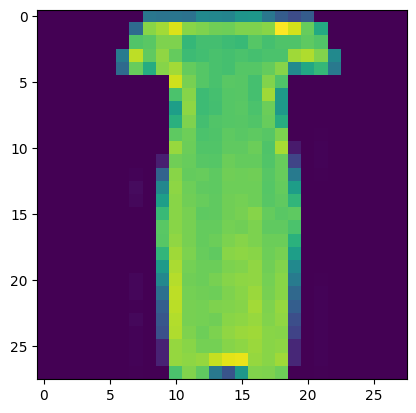

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[51])

In [ ]:
# Create a small list of training labels
labels = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
labels[train_labels[51]]

'Dress'

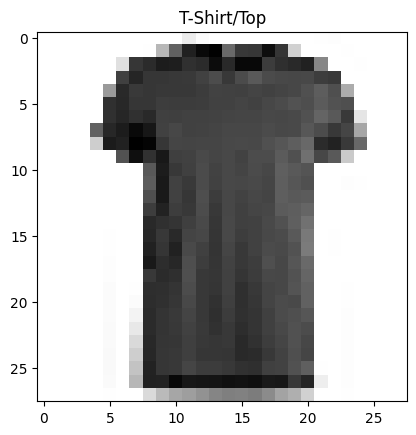

In [ ]:
num = 17
plt.imshow(train_data[num], cmap=plt.cm.binary);
plt.title(labels[train_labels[num]]);

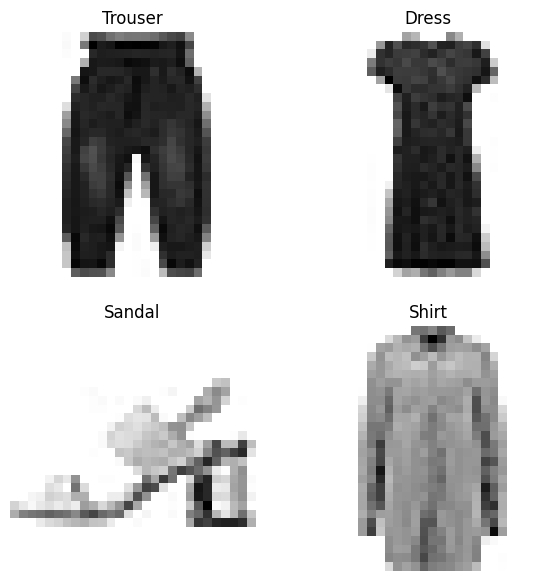

In [ ]:
# Plot multiple random images of the dataset
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary);
  plt.title(labels[train_labels[rand_index]]);
  plt.axis(False)

### Building the model

Things we need:
* Input Shape
* Output Shape - One Per Class / True Labels
* Loss Function

> If your labels are one-hot encoded use `CategoricalCrossEntropy()`

> If your labels are integers use `SparseCategoricalCrossEntropy()`

* Output activation

In [ ]:
# Input shape
train_data[0].shape

(28, 28)

In [ ]:
# Output shape
len(labels)

10

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

non_norm_history = model.fit(train_data,
                             train_labels,
                             epochs = 10,
                             validation_data = (test_data, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0984 - loss: 2.7419 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

### Normalize your data to make the model perform better i.e Feature Scaling

In [ ]:
# We can get our training and test data btwn 0 and 1 by dividing by the maximum
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

norm_history = model_2.fit(train_data_norm,
                        train_labels,
                        epochs = 10,
                        validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4835 - loss: 1.5471 - val_accuracy: 0.7243 - val_loss: 0.8844
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7338 - loss: 0.8245 - val_accuracy: 0.7511 - val_loss: 0.7270
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7622 - loss: 0.6862 - val_accuracy: 0.7833 - val_loss: 0.6338
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7946 - loss: 0.5956 - val_accuracy: 0.7974 - val_loss: 0.6055
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8053 - loss: 0.5640 - val_accuracy: 0.8000 - val_loss: 0.5904
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8122 - loss: 0.5471 - val_accuracy: 0.7992 - val_loss: 0.5826
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8157 - loss: 0.5361 - val_accuracy: 0.8008 - val_loss: 0.5775
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8180 - loss: 0.5278 - 

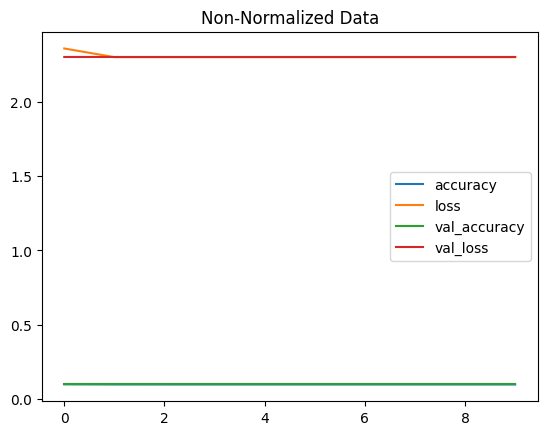

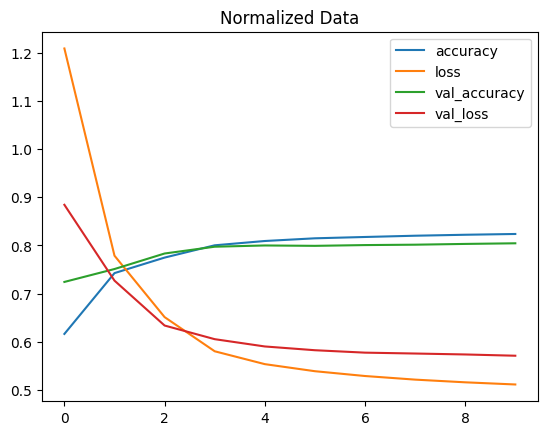

In [ ]:
# Copare the loss curves of the two
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized Data');
pd.DataFrame(norm_history.history).plot(title='Normalized Data');

### Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
# Create the learning_rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_3.fit(train_data_norm,
                        train_labels,
                        epochs = 40,
                        validation_data = (test_data_norm, test_labels),
                        callbacks = [lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2166 - loss: 2.0298 - val_accuracy: 0.2684 - val_loss: 1.7328 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2783 - loss: 1.6932 - val_accuracy: 0.3346 - val_loss: 1.5939 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3499 - loss: 1.5658 - val_accuracy: 0.3299 - val_loss: 1.5297 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3558 - loss: 1.5118 - val_accuracy: 0.3444 - val_loss: 1.5039 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3624 - loss: 1.4851 - val_accuracy: 0.3241 - val_loss: 1.4862 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3715 - loss: 1.4659 - val_accuracy: 0.3529 - val_loss: 1.4674 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3797 - l

Text(0, 0.5, 'Loss')

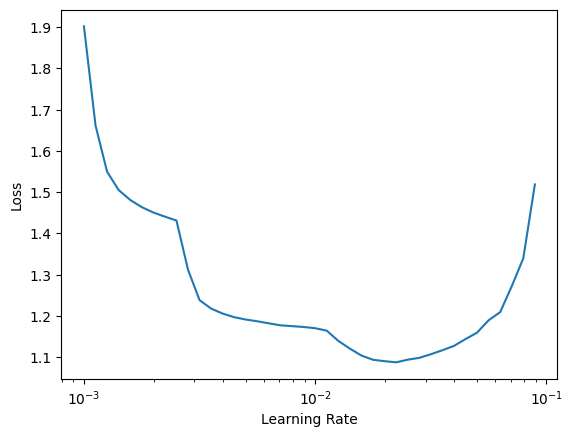

In [ ]:
lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

10**-3 is the ideal lr which is the default value for Adam

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

with_newlr_history = model_4.fit(train_data_norm,
                        train_labels,
                        epochs = 20,
                        validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4218 - loss: 1.5431 - val_accuracy: 0.7244 - val_loss: 0.8128
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7471 - loss: 0.7653 - val_accuracy: 0.7591 - val_loss: 0.6999
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7703 - loss: 0.6733 - val_accuracy: 0.7778 - val_loss: 0.6530
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7870 - loss: 0.6310 - val_accuracy: 0.7854 - val_loss: 0.6270
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7935 - loss: 0.6082 - val_accuracy: 0.7896 - val_loss: 0.6137
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7969 - loss: 0.5937 - val_accuracy: 0.7910 - val_loss: 0.6060
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7999 - loss: 0.5842 - val_accuracy: 0.7915 - val_loss: 0.5985
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8022 - loss: 0.5770 - 

## Evaluate the model

In [ ]:
# Use a confusion matrix
# Let's make the confusion matrix more visually interesting
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_conf_mat(y_true, y_preds, classes=None):
  figsize = (15, 15)

  conf_mat = confusion_matrix(y_true, y_preds)
  conf_norm = conf_mat.astype("float")/ conf_mat.sum(axis=1)[:, np.newaxis] # This will normalize our confusion matrix
  n_classes = conf_mat.shape[0]

  # lets prettify it
  fig , ax = plt.subplots(
      figsize=figsize,

  )
  # create a matrix plot
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(n_classes)

  ax.set(title='Confusion matrix',
        xlabel= 'Predictions',
        ylabel= 'True labels',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        yticklabels= labels,
        xticklabels= labels)

  # Set a threshold for different color
  threshold = ((conf_mat.max() + conf_mat.min()) / 2.)

  # Set axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # plot text in each cell
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, f"{conf_mat[i, j]} ({conf_norm[i, j]*100:.1f}%)",
        horizontalalignment='center',
        color = 'white' if conf_mat[i, j] > threshold else "black",
        size = 10
  )

In [ ]:
y_probs = model_4.predict(test_data_norm)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.80758400e-09, 1.60359087e-10, 8.05854583e-08, 2.18001745e-07,
        3.50037595e-07, 4.07160014e-01, 1.46567281e-09, 1.11448728e-01,
        2.23248702e-04, 4.81167316e-01],
       [1.00205740e-04, 4.96811126e-08, 6.38516843e-01, 2.53199297e-03,
        2.38575265e-01, 4.05516704e-10, 1.20263174e-01, 7.22220494e-27,
        1.24720118e-05, 1.37469248e-24],
       [2.42554119e-08, 9.99532759e-01, 4.19131292e-11, 4.66156111e-04,
        4.89925149e-08, 3.64806652e-07, 5.57880020e-10, 5.62932485e-07,
        2.63478156e-10, 1.13887401e-17],
       [2.31459008e-09, 9.99467969e-01, 8.61633074e-12, 5.31985308e-04,
        2.18945573e-08, 2.16354756e-08, 4.27844080e-11, 7.65929897e-09,
        5.96868865e-12, 8.31708376e-21],
       [1.17546238e-01, 2.46355397e-04, 2.00980559e-01, 4.36898321e-02,
        3.16013768e-02, 1.15010786e-04, 6.02564335e-01, 1.90501486e-11,
        3.25621571e-03, 3.53191885e-11]], dtype=float32)

In [ ]:
model_4.predict(test_data_norm[0].reshape(1, 28, 28)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


9

In [ ]:
y_probs[0], labels[tf.argmax(y_probs[0])]

(array([8.8075840e-09, 1.6035909e-10, 8.0585458e-08, 2.1800174e-07,
        3.5003760e-07, 4.0716001e-01, 1.4656728e-09, 1.1144873e-01,
        2.2324870e-04, 4.8116732e-01], dtype=float32),
 'Ankle boot')

In [ ]:
# convert all of the prediction probabilities into intergers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

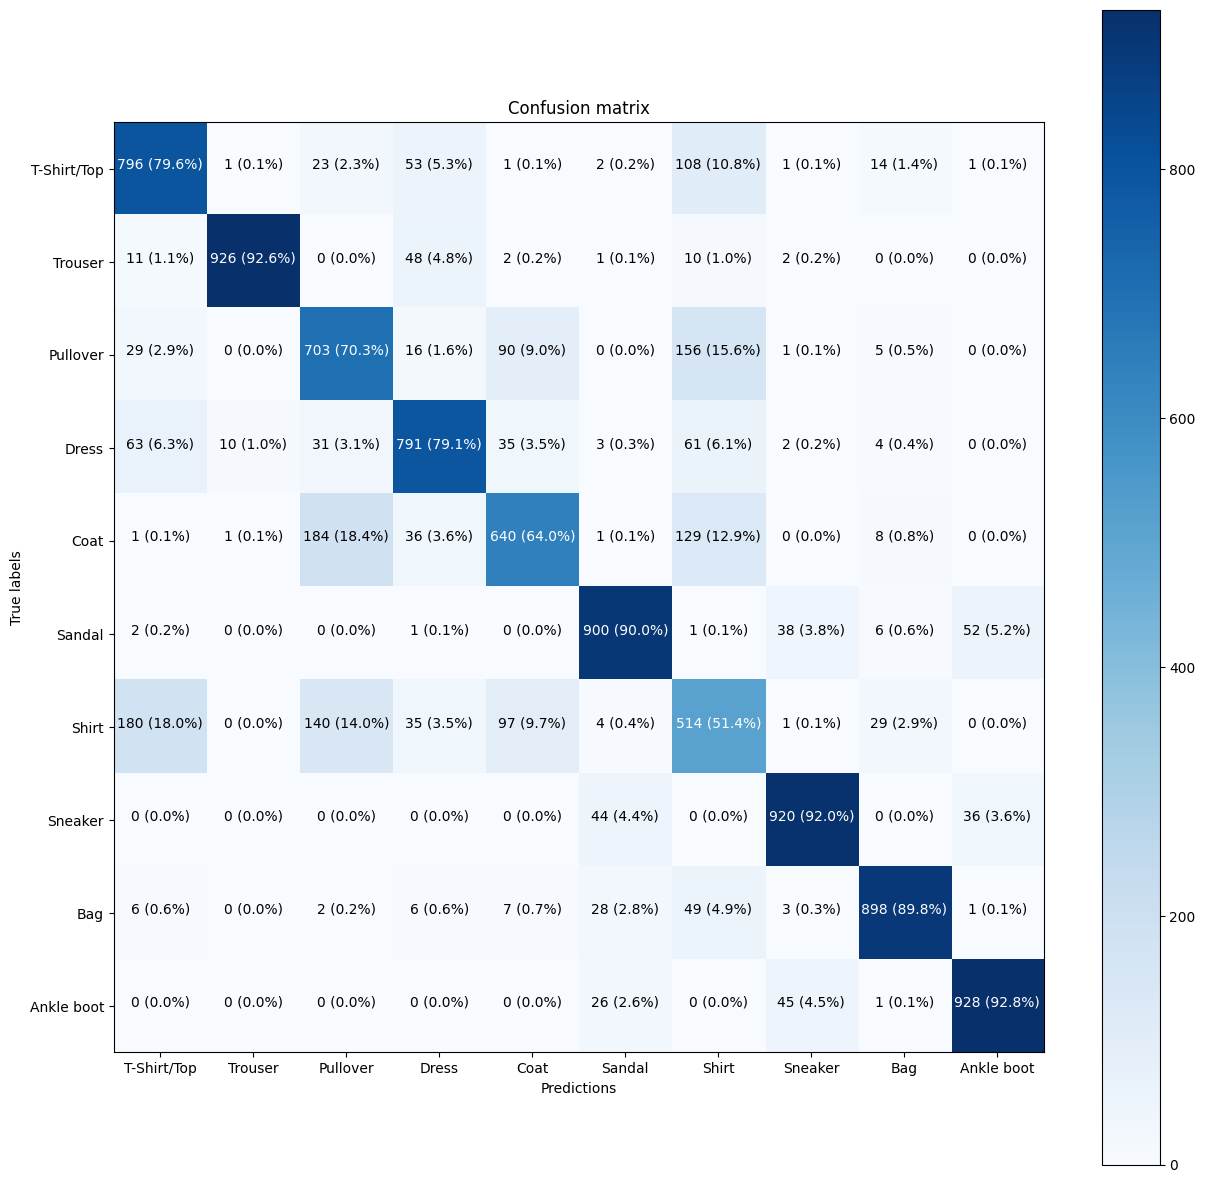

In [ ]:
plot_conf_mat(test_labels, y_preds, classes=labels)

Create a function to:
* Plot a Random Image
* Make a prediction for the said Image
* Label the plot with true label amd predicted label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


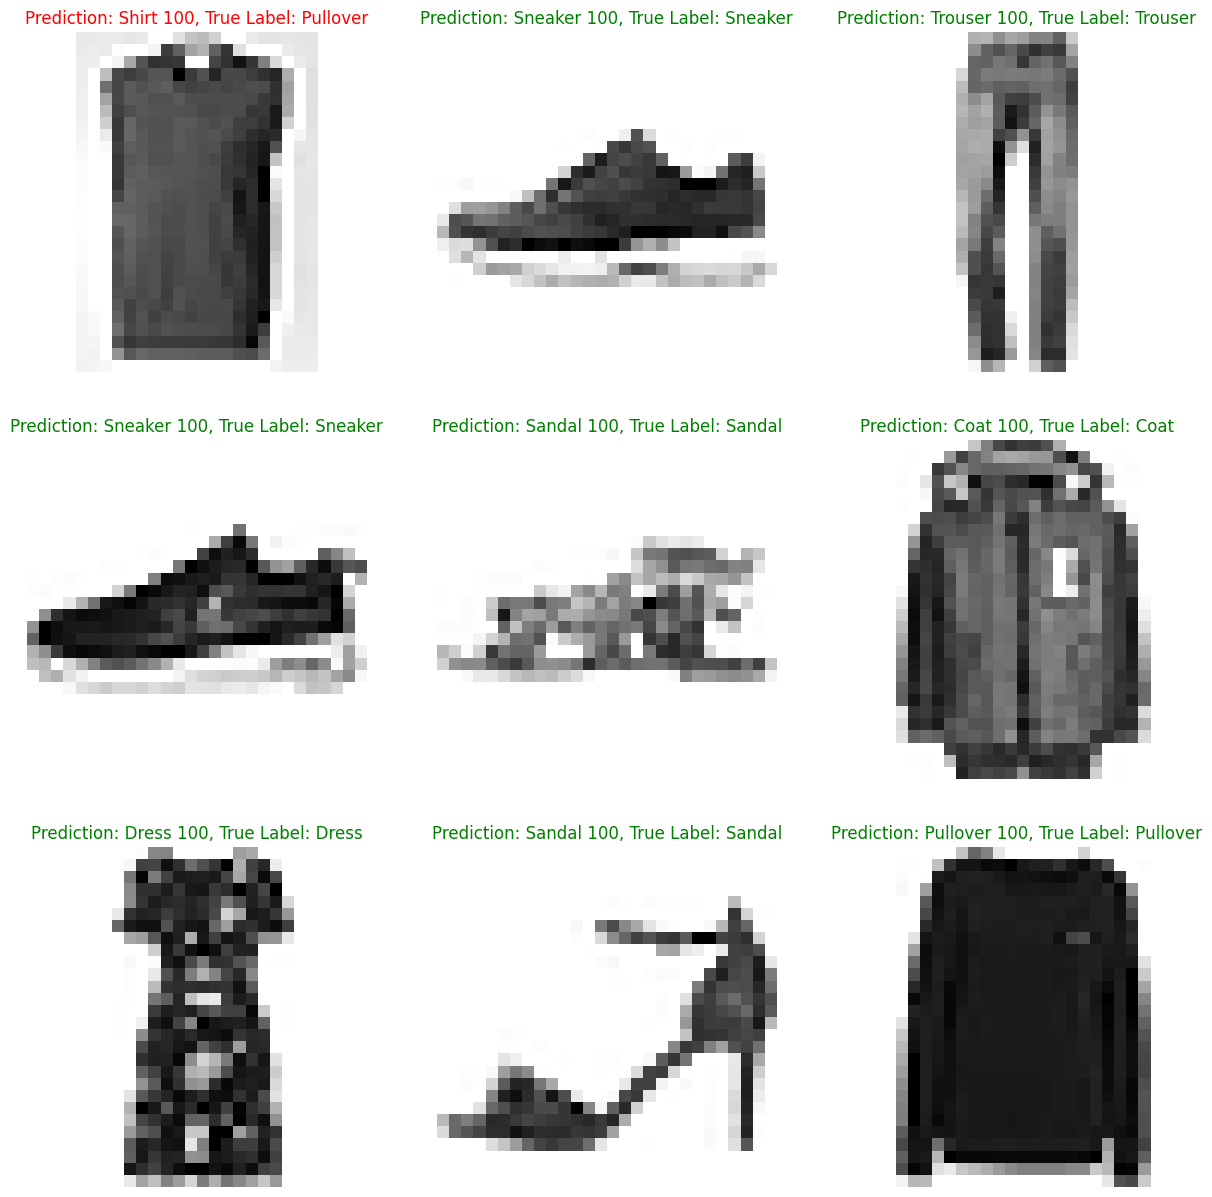

In [ ]:
def make_predictions(model, y_true, classes):
  plt.figure(figsize=(15, 15))
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    rand_index = random.choice(range(len(test_data_norm)))
    plt.imshow(test_data[rand_index], cmap=plt.cm.binary);
    prediction = classes[model.predict(test_data_norm[rand_index].reshape(1, 28, 28)).argmax()]
    true_label = classes[y_true[rand_index]]
    if prediction == true_label:
      plt.title(f"Prediction: {prediction} {100 * tf.reduce_max(test_data_norm[rand_index].reshape(1, 28, 28)):2.0f}, True Label: {true_label}", c='g');
    else:
      plt.title(f"Prediction: {prediction} {100 * tf.reduce_max(test_data_norm[rand_index].reshape(1, 28, 28)):2.0f}, True Label: {true_label}", c='r');
    plt.axis(False)

make_predictions(model_4, test_labels, labels)

### What Patters is our model learning

In [ ]:
model_4.layers

[<Flatten name=flatten_9, built=True>,
 <Dense name=dense_30, built=True>,
 <Dense name=dense_31, built=True>,
 <Dense name=dense_32, built=True>]

In [ ]:
model_4.layers[1]

<Dense name=dense_30, built=True>

In [ ]:
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[ 0.1549757 , -0.30094823,  0.27161255, -0.44665256],
        [ 0.22319643, -0.58057296, -0.39588213,  0.90277606],
        [ 0.5175848 , -0.62469524, -0.56973773, -0.38248026],
        ...,
        [ 0.27949402, -0.209554  , -0.20900457,  0.15112923],
        [-0.23559989, -0.12945744,  0.5367529 ,  0.25883493],
        [ 0.44035372, -0.39280868,  0.23287253,  0.21081334]],
       dtype=float32),
 (784, 4))

In [ ]:
# let'scheck out the bias vector
biases, biases.shape

(array([-0.23541678, -0.32351097,  0.61287564,  0.99399275], dtype=float32),
 (4,))

In [ ]:
!git clone https://github.com/JetBrains/colorSchemeTool.git

Cloning into 'colorSchemeTool'...
remote: Enumerating objects: 1047, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1047 (delta 8), reused 16 (delta 6), pack-reused 1022
Receiving objects: 100% (1047/1047), 885.33 KiB | 3.95 MiB/s, done.
Resolving deltas: 100% (737/737), done.


In [ ]:
!wget https://raw.githubusercontent.com/markusylisiurunen/github-dark-mode/main/themes/github-dark-mode.json

--2024-08-09 15:14:54--  https://raw.githubusercontent.com/markusylisiurunen/github-dark-mode/main/themes/github-dark-mode.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21508 (21K) [text/plain]
Saving to: ‘github-dark-mode.json’

github-dark-mode.js 100%[===================>]  21.00K  --.-KB/s    in 0.005s  

2024-08-09 15:14:54 (3.88 MB/s) - ‘github-dark-mode.json’ saved [21508/21508]



In [ ]:
!mv github-dark-mode.json Github\ Dark.json

In [ ]:
!mv Github\ Dark.json colorSchemeTool/vscThemes/

In [ ]:
%%bash
cd colorSchemeTool/
bash convert.sh

converting ./vscThemes/Github Dark.json to ./tmThemes/Github Dark.tmTheme ...
converting ./vscThemes/Monokai.json to ./tmThemes/Monokai.tmTheme ...
converting ./tmThemes/Active4D.tmTheme to ./intellijThemes/Active4D.icls ...
converting ./tmThemes/All Hallow's Eve.tmTheme to ./intellijThemes/All Hallow's Eve.icls ...
converting ./tmThemes/Amy.tmTheme to ./intellijThemes/Amy.icls ...
converting ./tmThemes/Blackboard.tmTheme to ./intellijThemes/Blackboard.icls ...
converting ./tmThemes/Cobalt.tmTheme to ./intellijThemes/Cobalt.icls ...
converting ./tmThemes/Dawn.tmTheme to ./intellijThemes/Dawn.icls ...
converting ./tmThemes/Eiffel.tmTheme to ./intellijThemes/Eiffel.icls ...
converting ./tmThemes/Espresso Libre.tmTheme to ./intellijThemes/Espresso Libre.icls ...
converting ./tmThemes/Github Dark.tmTheme to ./intellijThemes/Github Dark.icls ...
converting ./tmThemes/Github.tmTheme to ./intellijThemes/Github.icls ...
converting ./tmThemes/IDLE.tmTheme to ./intellijThemes/IDLE.icls ...
conve

Traceback (most recent call last):
  File "/content/colorSchemeTool/colorSchemeTool.py", line 926, in <module>
    all_settings, used_scopes = load_textmate_scheme(sys.argv[1])
  File "/content/colorSchemeTool/colorSchemeTool.py", line 774, in load_textmate_scheme
    themeDict = plistlib.load(f)
  File "/usr/lib/python3.10/plistlib.py", line 884, in load
    return p.parse(fp)
  File "/usr/lib/python3.10/plistlib.py", line 186, in parse
    self.parser.ParseFile(fileobj)
  File "../Modules/pyexpat.c", line 468, in EndElement
  File "/usr/lib/python3.10/plistlib.py", line 204, in handle_end_element
    handler()
  File "/usr/lib/python3.10/plistlib.py", line 245, in end_key
    raise ValueError("unexpected key at line %d" %
ValueError: unexpected key at line 6
